# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results , on='Mouse ID', how = 'outer')

# Display the data table for preview
merged_df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [119]:
#group Mouse ID
m_group = merged_df.groupby('Mouse ID')
# Checking the number of mice.
mice_total = len(m_group.count())
mice_total

249

In [120]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Identify duplicate rows
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

#Extract the Mouse IDs associated with the duplicates
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

#Show the result
duplicate_mouse_ids

array(['g989'], dtype=object)

In [121]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_duplicate_mouse = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)]
all_data_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.C
clean_df =  merged_df.drop(index=all_data_duplicate_mouse.index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [123]:
# Checking the number of mice in the clean DataFrame.
mice_total_cleaned_data = len(clean_df.groupby('Mouse ID').count())
mice_total_cleaned_data

248

## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen' and calculate summary statistics
summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Tumor Volume Std.Dev.',
    'sem': 'Tumor Volume Std.Err.'
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_2 = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
)
summary_stats_2




,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

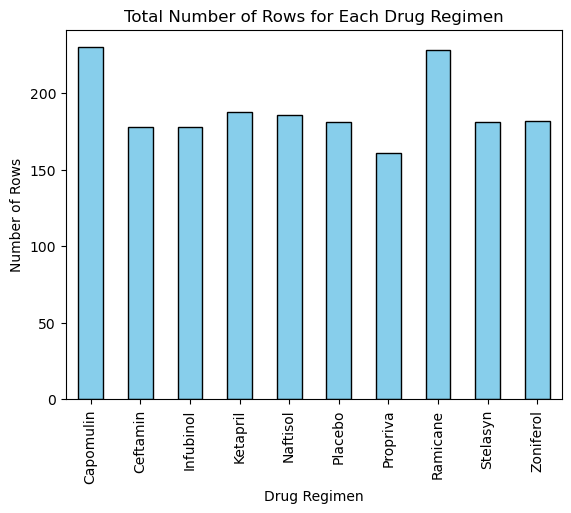

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merged_df.groupby('Drug Regimen').size()

# Plot the bar chart
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

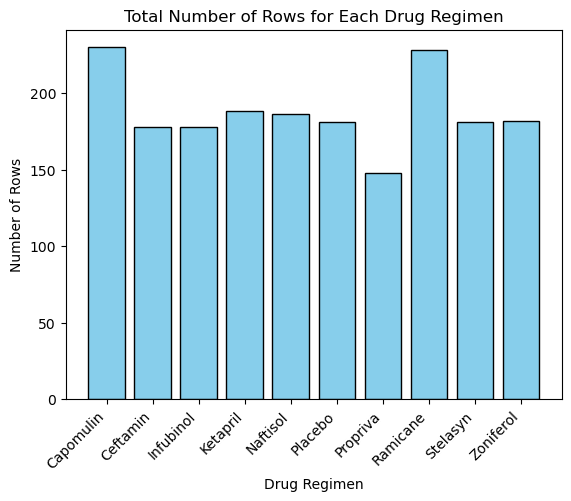

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and calculate the count of rows
regimen_counts = clean_df.groupby('Drug Regimen').size()

# Extracting values for plotting
regimen_names = regimen_counts.index
row_counts = regimen_counts.values

# Plot the bar chart using pyplot
plt.bar(regimen_names, row_counts, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

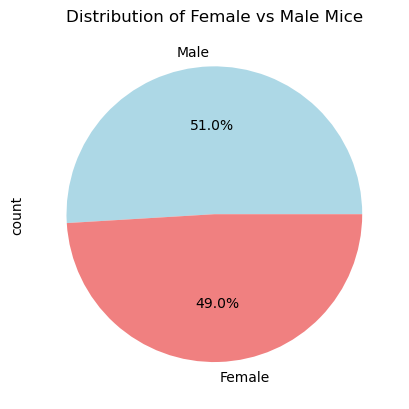

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by 'Sex' and calculate the count of mice in each category
sex_distribution = clean_df['Sex'].value_counts()

# Plot the pie chart using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

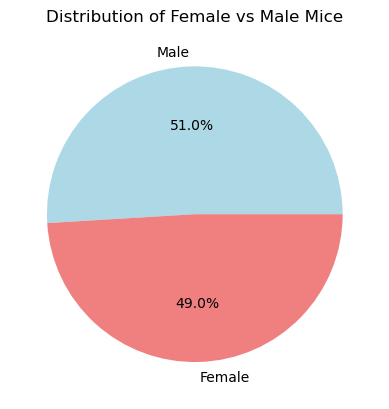

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by 'Sex' and calculate the count of mice in each category
sex_distribution = clean_df['Sex'].value_counts()

# Plot the pie chart using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[merged_df['Drug Regimen'].isin(selected_regimens)]
final_tumor_volume_df = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the resulting DataFrame
final_tumor_volume_df

C:\Users\johnn\AppData\Local\Temp\ipykernel_3672\1567758062.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = clean_df[merged_df['Drug Regimen'].isin(selected_regimens)]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [131]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(tumor_vol_subset)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = tumor_vol_subset.loc[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    
    # Print results
    print(f"Potential outliers for {treatment}: {outliers}")

# Print the list of tumor volume data for plotting
# tumor_vol_data

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


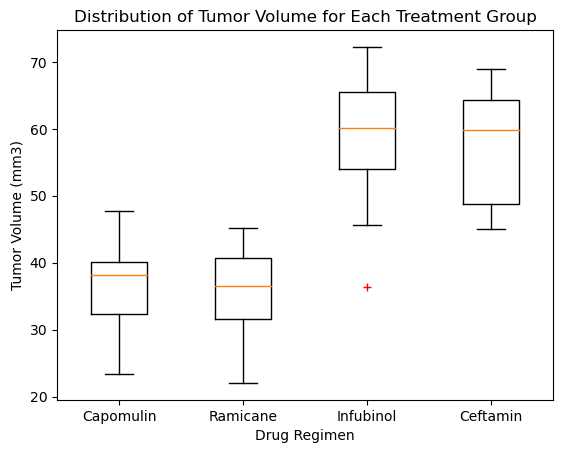

In [132]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to store tumor volume data for each treatment
tumor_vol_data = [final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

# Create a boxplot
plt.boxplot(tumor_vol_data, labels=treatments, notch=False, sym='r+')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')


# Show the plot
plt.show()

## Line and Scatter Plots

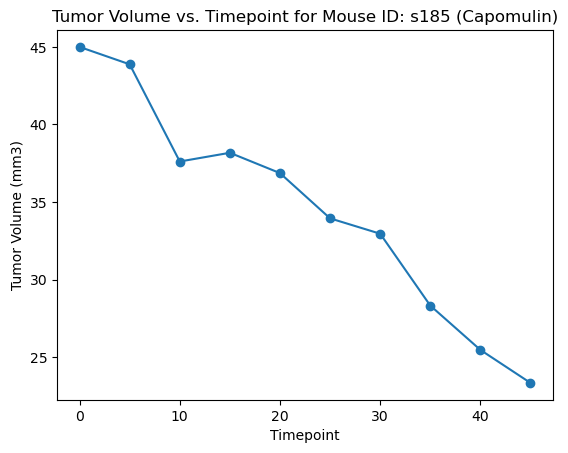

In [133]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Choose a specific Mouse ID from the list
selected_mouse_id = 's185'  # Replace with the actual Mouse ID you are interested in

# Filter the DataFrame for the selected Mouse ID
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Extract the x-axis (Timepoint) and y-axis (Tumor Volume)
x_axis = selected_mouse_data['Timepoint']
y_axis = selected_mouse_data['Tumor Volume (mm3)']

# Create a line plot
plt.plot(x_axis, y_axis, marker='o')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID: {selected_mouse_id} (Capomulin)')

# Show the plot
plt.show()


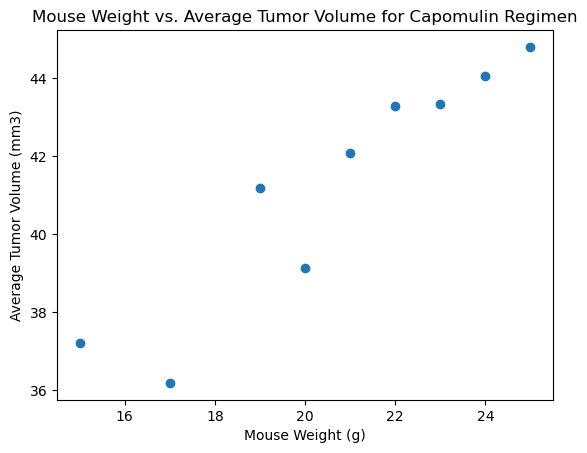

In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume back to the original Capomulin data based on 'Mouse ID'
capomulin_summary = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Extract the unique mouse weights and corresponding average tumor volumes
weights = capomulin_summary['Weight (g)'].unique()
average_tumor_volumes = capomulin_summary.groupby('Weight (g)')['Tumor Volume (mm3)_average'].mean()

# Create a scatter plot
plt.scatter(weights, average_tumor_volumes, marker='o')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425967


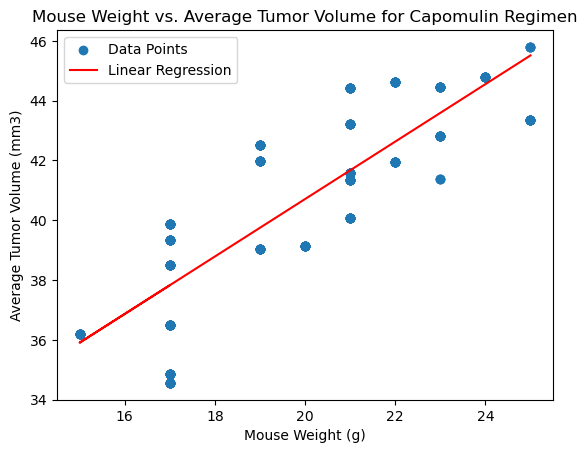

In [135]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress
# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)_average'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)_average'])

# Create a scatter plot
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)_average'], marker='o', label='Data Points')

# Add the regression line to the plot
regression_line = slope * capomulin_summary['Weight (g)'] + intercept
plt.plot(capomulin_summary['Weight (g)'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Add a legend
plt.legend()

# Show the plot
plt.show()